In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
sentiment_df = pd.read_csv('/content/drive/MyDrive/ds_ayush_bhadouriya/csv_files/fear_greed_index.csv')
trader_df = pd.read_csv('/content/drive/MyDrive/ds_ayush_bhadouriya/csv_files/historical_data.csv')

In [3]:
sentiment_df['date'] = pd.to_datetime(sentiment_df['date']).dt.date

trader_df['date'] = pd.to_datetime(trader_df['Timestamp'], unit='ms').dt.date

trader_df = trader_df.dropna(subset=['Closed PnL', 'Size USD'])

df = pd.merge(trader_df, sentiment_df, on='date', how='inner')
df.to_csv("/content/drive/MyDrive/ds_ayush_bhadouriya/csv_files/cleaned_data.csv", index=False)

/tmp/ipython-input-708404713.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='classification', y='Size USD', estimator='sum', palette='viridis')


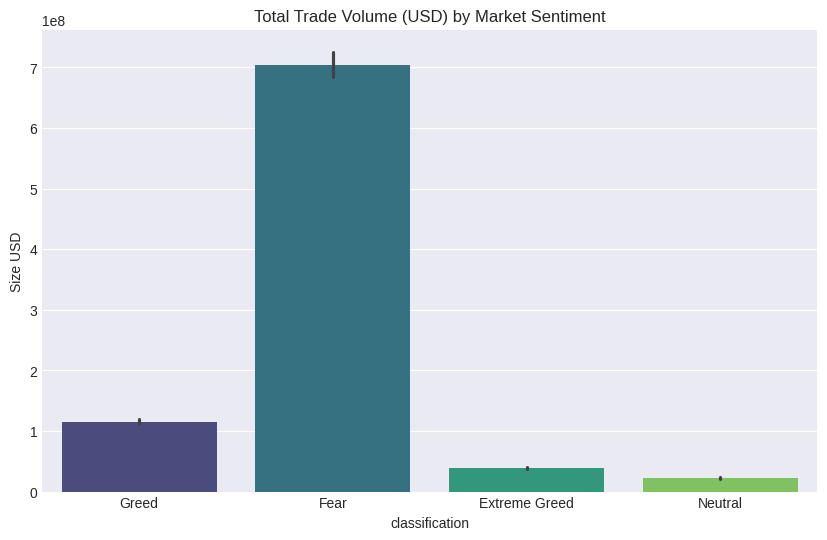

In [4]:
plt.style.use('seaborn-v0_8-darkgrid')

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='classification', y='Size USD', estimator='sum', palette='viridis')
plt.title('Total Trade Volume (USD) by Market Sentiment')
plt.savefig("/content/drive/MyDrive/ds_ayush_bhadouriya/outputs/volume_vs_sentiment.png")

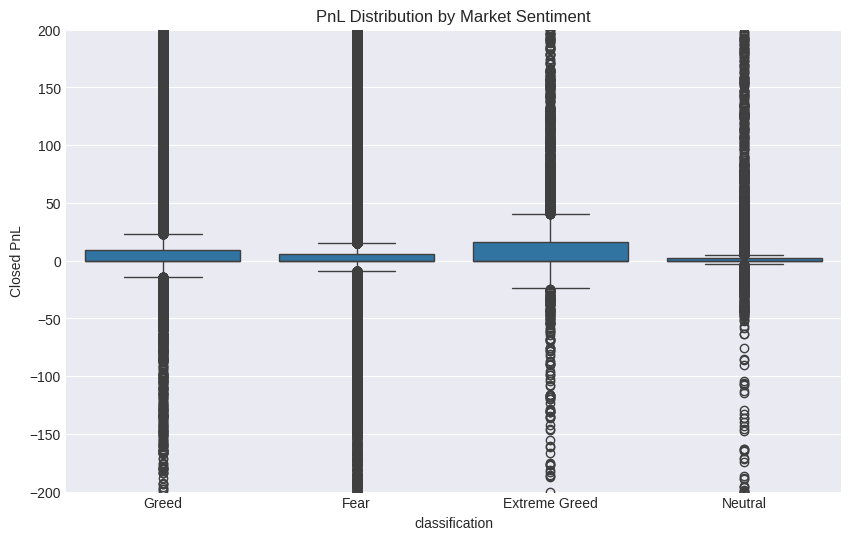

In [5]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='classification', y='Closed PnL')
plt.title('PnL Distribution by Market Sentiment')
plt.ylim(-200, 200)
plt.savefig("/content/drive/MyDrive/ds_ayush_bhadouriya/outputs/pnl_dist_sentiment.png")

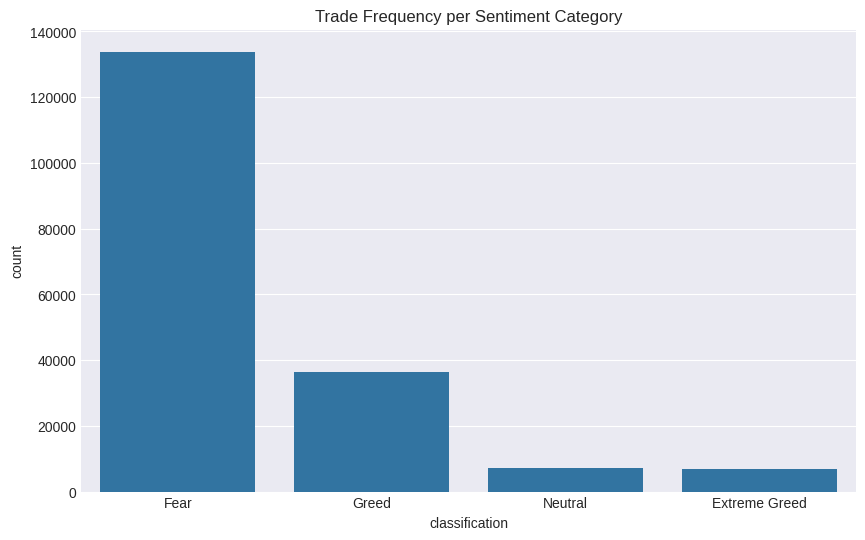

In [6]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='classification', order=df['classification'].value_counts().index)
plt.title('Trade Frequency per Sentiment Category')
plt.savefig("/content/drive/MyDrive/ds_ayush_bhadouriya/outputs/trade_count_sentiment.png")